# UTS

Analisa Terhadap Dataset Breast Cancer Coimbra dengan menggunakan klasifikasi Naive Bayes dan Decision Tree

## Naive Bayes

P(C|X) = P(X|C) * P(C)

P(X|C) = $$ \frac{1}{\sqrt{2\Pi \sigma^{2}j }} e^{-\frac{(X_i-\mu)^{2}}{2\sigma^{2}j}} $$

In [ ]:

# Naive Bayes Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [ ]:
dataset_url = "https://raw.githubusercontent.com/Nauvaldi/Dataset/main/dataR2.csv"
dataset = pd.read_csv(dataset_url)

In [ ]:
dataset.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
#Spliting the dataset in independent and dependent variables
X = dataset.iloc[:,:10].values
y = dataset['Classification'].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [ ]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
GaussianNB(priors=None)

GaussianNB()

In [ ]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[2 1 2 2 1 1 2 1 2 2 1 1 2 1 2 2 2 2 2 1 1 1 2 1]


In [ ]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:10,:]

array([[2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [1, 1],
       [1, 1],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2]])

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0]
 [ 0 13]]


In [ ]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))     

Correct predictions:  24
False predictions 0


Accuracy of the Naive Bayes Clasification is:  1.0


## Decision Tree With Gini Index

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [ ]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset iris
dataset_url = "https://raw.githubusercontent.com/Nauvaldi/Dataset/main/dataR2.csv"
data = pd.read_csv(dataset_url)
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [ ]:
Data1 = data[data.Classification == 1]
Data1.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
Data2 = data[data.Classification == 2]
Data2.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
52,45,21.303949,102,13.852,3.485163,7.6476,21.056625,23.03408,552.444,2
53,45,20.829995,74,4.560,0.832352,7.7529,8.237405,28.03230,382.955,2
54,49,20.956608,94,12.305,2.853119,11.2406,8.412175,23.11770,573.630,2
55,34,24.242424,92,21.699,4.924226,16.7353,21.823745,12.06534,481.949,2
56,42,21.359915,93,2.999,0.687971,19.0826,8.462915,17.37615,321.919,2


In [ ]:
x = data.drop(["Classification"], axis = 1)
y = data.Classification.values

In [ ]:
# Normalization:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

Preparing data for Model Building

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

Import Decision Tree to build Classification Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

Cek Akurasi Model

In [ ]:
# prediction
dt.score(x_test, y_test)

0.7714285714285715

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.7714285714285715


Visualisasi Decision tree

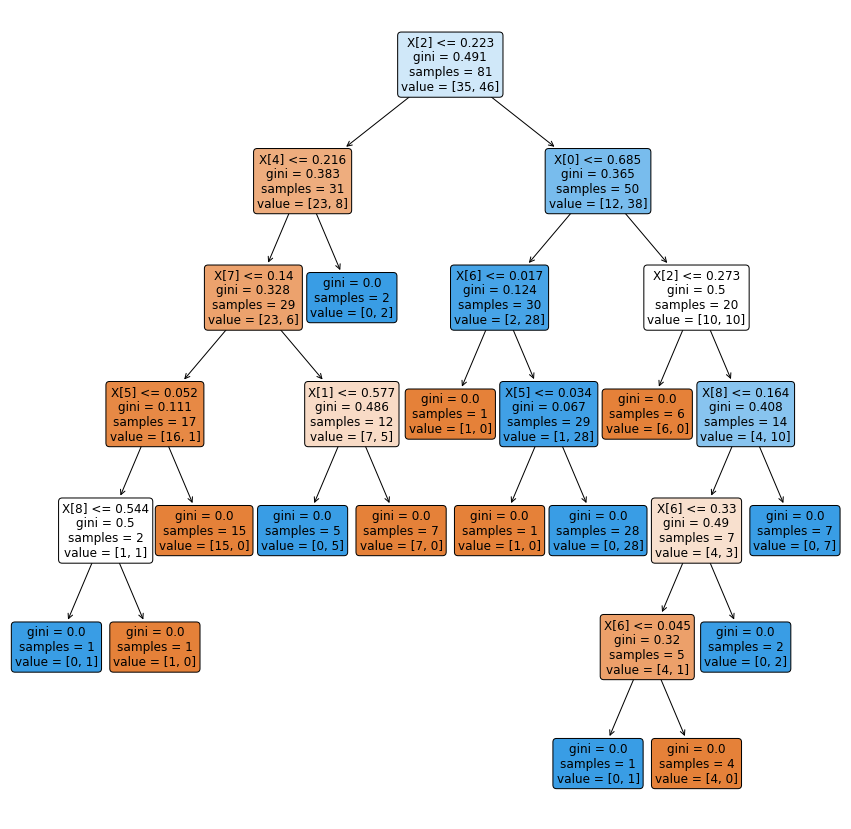

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(dt,
                   rounded = True,
                   filled = True,
                   fontsize=12)
#show the plot
plt.show()